This code performs data preprocessing, trains a Multi-Layer Perceptron (MLP) classifier, and evaluates its performance on the breast cancer dataset. It also plots the loss curve, validation scores, and a confusion matrix to assess the model's performance.

Importing Libraries and Loading Data

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn import datasets
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score



# Load the breast cancer dataset
cancer = datasets.load_breast_cancer()


 Data Exploration

In [2]:
# Display feature names
print(f"Features: {cancer.feature_names}")




Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
# Create a DataFrame from the dataset's data and feature names
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Add a 'target' column to the DataFrame
df["target"] = cancer.target

# Display the first few rows of the DataFrame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Data Preprocessing (Scaling)

StandardScaler is a preprocessing technique used to standardize or normalize the features (variables) of a dataset. It's a crucial step in preparing data for machine learning, including neural network models. Standardization rescales the features such that they have a mean of 0 and a standard deviation of 1.

using StandardScaler to preprocess your data is a good practice, especially for neural network models, because it can enhance training stability, speed up convergence, and improve overall model performance. It helps ensure that features are on a consistent scale and mitigates potential issues associated with unscaled or differently scaled data.

In [6]:
# Define columns to be scaled
columns_to_scale = cancer.feature_names

# Scale the selected columns using StandardScaler
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the first few rows of the scaled DataFrame
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


Data Splitting

In [7]:
# Split the data into training and testing sets
X = df.drop(columns=["target"])
y = df["target"]

# Specify the test size and random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")


Train: (455, 30)
Test: (114, 30)


Model Training (Neural Network)

In [8]:
# Import MLPClassifier for neural network classification
from sklearn.neural_network import MLPClassifier

# Create and train a Multi-Layer Perceptron (MLP) classifier model
model = MLPClassifier(random_state=42,
                      max_iter=1000,
                      hidden_layer_sizes=(20, 10,),
                      n_iter_no_change=100,
                      early_stopping=True,
                      verbose=True).fit(X_train, y_train)


Iteration 1, loss = 0.93135875
Validation score: 0.369565
Iteration 2, loss = 0.89351316
Validation score: 0.369565
Iteration 3, loss = 0.85987889
Validation score: 0.369565
Iteration 4, loss = 0.82680374
Validation score: 0.369565
Iteration 5, loss = 0.79594718
Validation score: 0.369565
Iteration 6, loss = 0.76606044
Validation score: 0.369565
Iteration 7, loss = 0.73807314
Validation score: 0.369565
Iteration 8, loss = 0.71139437
Validation score: 0.369565
Iteration 9, loss = 0.68603358
Validation score: 0.391304
Iteration 10, loss = 0.66146807
Validation score: 0.391304
Iteration 11, loss = 0.63738753
Validation score: 0.413043
Iteration 12, loss = 0.61328015
Validation score: 0.521739
Iteration 13, loss = 0.58989546
Validation score: 0.565217
Iteration 14, loss = 0.56654547
Validation score: 0.630435
Iteration 15, loss = 0.54314692
Validation score: 0.673913
Iteration 16, loss = 0.52004862
Validation score: 0.717391
Iteration 17, loss = 0.49716750
Validation score: 0.760870
Iterat

Loss and Validation Curve Plots

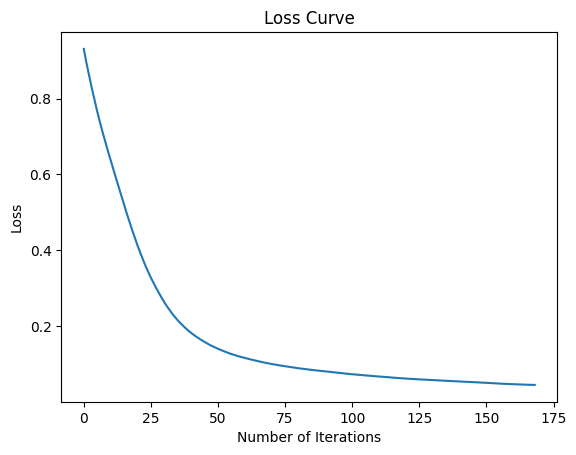

In [9]:
# Plot the loss curve
loss_curve = model.loss_curve_
plt.plot(loss_curve)
plt.title('Loss Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.show()




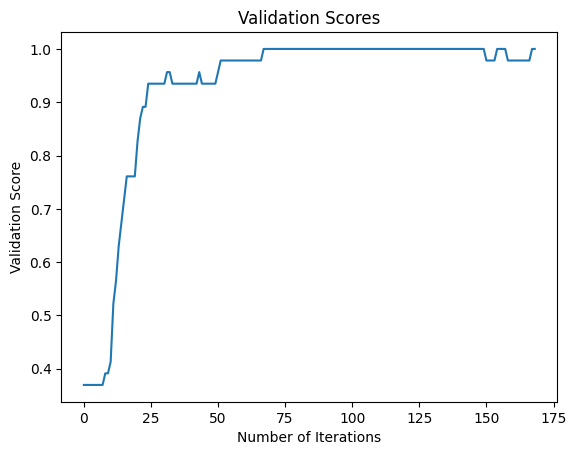

In [10]:
# Plot the validation scores
validation_scores = model.validation_scores_
plt.plot(validation_scores)
plt.title('Validation Scores')
plt.xlabel('Number of Iterations')
plt.ylabel('Validation Score')
plt.show()

Model Evaluation and Confusion Matrix

In [11]:
# Calculate and print the training and testing accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")




Training Accuracy: 0.97
Testing Accuracy: 0.98


In [12]:
# Make predictions on the test data
predictions = model.predict(X_test)



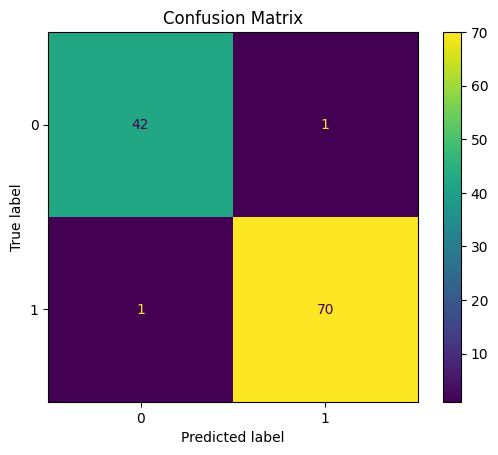

In [15]:
# Calculate and display the confusion matrix
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()